In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

%run '../functions.py'
%run '../classes.py'
model_w2v_settings = return_best_model()
import copy as cp
model_w2v_settings = cp.deepcopy(model_w2v_settings)
model_w2v_settings['model_path'] = "../all_datasets/" + model_w2v_settings['model_path']

model_w2v = Word2VecModel(model_w2v_settings)

# read preprocessed data from pickle file
df = pd.read_pickle('data/preprocessed_titles_labels.pkl')
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/adammajczyk/nltk_data..

,title,is_clickbait,text,dataset,sample
3,"[hillary, clinton, john, kerry, divergent, pat...",0,"WASHINGTON — Early in 2011, after a hectic ...",fake-news,train
7,"[fifa, seventeen, special, arrival, season, pl...",1,Support Us Fifa 17 – The special arrivals seas...,fake-news,train
11,"[orlando, shooting, unlikely, lead, major, new...",0,WASHINGTON — It didn’t happen after a congr...,fake-news,train
14,"[war, islam, islam, want, war, peace]",1,link I am sure that this post will fall on dea...,fake-news,train
16,"[university, texas, campus, saying, concealed,...",0,"AUSTIN, Tex. — As classes began here at the...",fake-news,train


In [2]:
# split data into train and test stratified by y
import os
import pickle

df['title_vector'] = [get_word_vectors(model_w2v, title, aggregation='mean') for title in df['title']]

X_train = np.vstack(df[df['sample']=='train']['title_vector'])
X_test = np.vstack(df[df['sample']=='val2']['title_vector'])



y_train = df[df['sample']=='train']['is_clickbait']
y_test = df[df['sample']=='val2']['is_clickbait']


# read scaler from file
with open('predictive_models/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=[f'dim_{i}' for i in range(X_train_scaled.shape[1])])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=[f'dim_{i}' for i in range(X_test_scaled.shape[1])])

In [4]:
X_train_scaled_df

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_90,dim_91,dim_92,dim_93,dim_94,dim_95,dim_96,dim_97,dim_98,dim_99
0,-1.024120,0.328077,0.363865,-0.059081,0.075085,0.136644,-0.008037,0.221845,1.120483,-1.595419,...,0.346255,-0.760051,-0.644695,-0.114498,-0.420577,0.924527,1.276883,-0.477016,0.486927,0.522734
1,0.604483,0.165777,0.517797,-0.101692,0.400142,1.644174,-0.425471,-0.310252,-0.411243,0.682673,...,0.664615,-1.654566,0.169044,0.010970,-1.263710,-0.234046,-0.274425,-1.192353,-0.312729,-0.413182
2,1.050273,1.039808,-0.140270,0.809357,1.046279,0.786173,0.858510,-0.452139,-1.162415,0.954597,...,0.175811,0.052386,-1.351478,-0.325614,-0.049984,-0.292797,1.209691,0.296617,-0.348848,0.221987
3,0.914525,-2.921807,-1.999052,0.693614,-0.698740,2.554250,-2.539474,0.789982,0.046078,-0.449325,...,0.054509,-1.240096,0.272586,1.664612,-2.617218,1.040004,-2.069489,-3.653399,-2.965633,3.694856
4,0.317482,-0.411837,-0.722352,-0.242560,0.801235,-0.050781,1.226264,-0.993900,-0.848622,-0.782473,...,-1.747665,0.105540,-0.038547,0.267922,-1.527228,-1.104220,-0.189380,-0.678200,-0.767346,0.482145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17786,0.532971,0.880064,1.009638,0.736322,-0.172203,0.676863,1.133471,0.723591,-0.749136,0.507005,...,-0.072226,-0.029933,0.372319,-1.068429,-0.711729,0.617387,0.253031,0.042249,-0.035443,-0.223585
17787,-0.922626,0.579481,-0.297106,-0.258689,0.073953,0.870151,0.310611,-0.335878,0.680378,-0.258851,...,0.383119,-0.281064,0.172080,1.550640,0.207703,-0.636884,0.807790,-0.859353,-2.051300,0.620449
17788,-0.060696,0.813892,0.588183,2.063033,0.683206,0.290718,2.149768,-1.048276,0.296374,0.791609,...,-0.694929,-0.686439,1.344404,0.584193,-0.191230,0.940768,0.784768,-1.919816,1.087808,2.368421
17789,-0.575741,1.686775,0.205198,-0.759367,0.337049,-0.707847,1.862620,-1.226164,-0.296439,-0.414482,...,-4.232341,-0.755244,-1.545515,0.506010,-1.834587,-2.744447,-0.098490,-0.201242,0.360043,-0.221279


In [5]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

def return_model_with_param(model_name, param = dict()):
    if model_name == 'decision_tree':
        model = DecisionTreeClassifier(**param)
    elif model_name == 'random_forest':
        model = RandomForestClassifier(**param)
    elif model_name == 'xgboost':
        model = XGBClassifier(**param)
    elif model_name == 'lightgbm':
        model = LGBMClassifier(**param, verbose=-1)
    elif model_name == 'catboost':
        model = CatBoostClassifier(**param, verbose=0)
    return model

In [6]:
# train LightGBM model for each dimension


from sklearn.metrics import roc_auc_score, f1_score
from tqdm.notebook import tqdm



result_dict = {}
model_names = ['lightgbm', 'decision_tree',   'xgboost', 'random_forest','catboost',]
for name in model_names:
    result_dict[name] = dict()

models = dict()
for name in model_names:
    models[name] = cp.deepcopy(0)
models['lightgbm'] = 1

for name in tqdm(model_names):
    # for dim in tqdm(X_train_scaled_df.columns):
    #     model = return_model_with_param(name)
    #     model.fit(X_train_scaled_df[dim].values.reshape(-1,1), y_train)

    #     # calculate auc, f1
    #     y_pred_proba = model.predict_proba(X_test_scaled_df[dim].values.reshape(-1,1))[:, 1]
    #     auc = roc_auc_score(y_test, y_pred_proba)

    #     y_pred = model.predict(X_test_scaled_df[dim].values.reshape(-1,1))
    #     f1 = f1_score(y_test, y_pred)
    #     result_dict[name][dim] = {'auc': auc, 'f1': f1}
    model = return_model_with_param(name)

    model.fit(X_train_scaled_df, y_train)
    result_dict[name]['feature_importance'] = model.feature_importances_

    models[name] = cp.deepcopy(model)
result_df = pd.DataFrame(result_dict).T






  0%|          | 0/5 [00:00<?, ?it/s]

In [7]:
models

{'lightgbm': LGBMClassifier(verbose=-1),
 'decision_tree': DecisionTreeClassifier(),
 'xgboost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'random_forest': RandomForestClassifier(),
 'catboost': <catboost.core.CatBoostClassifier at 0x2a5465480>}

In [8]:
result_df['feature_importance_mean'] = result_df['feature_importance'].apply(lambda x: np.mean(x))
result_df['feature_importance_std'] = result_df['feature_importance'].apply(lambda x: np.std(x))

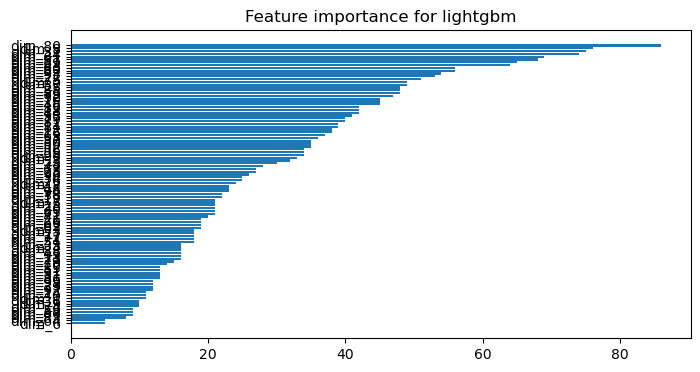

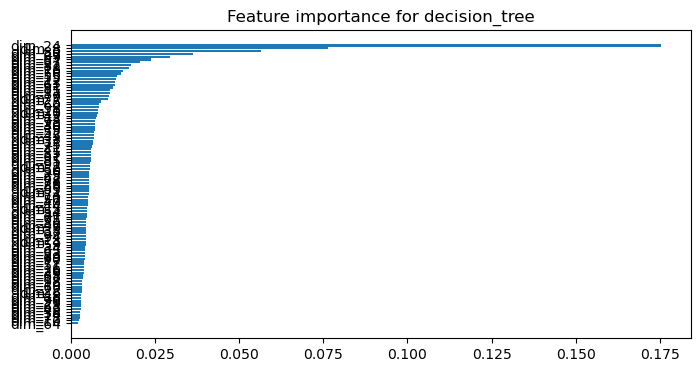

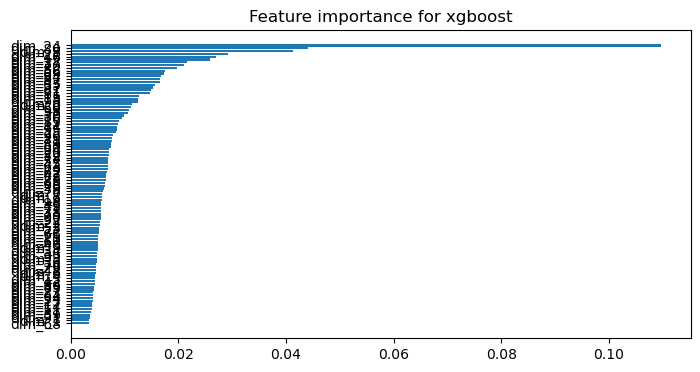

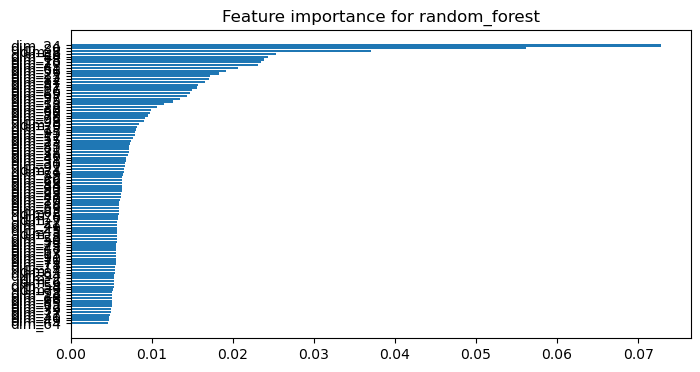

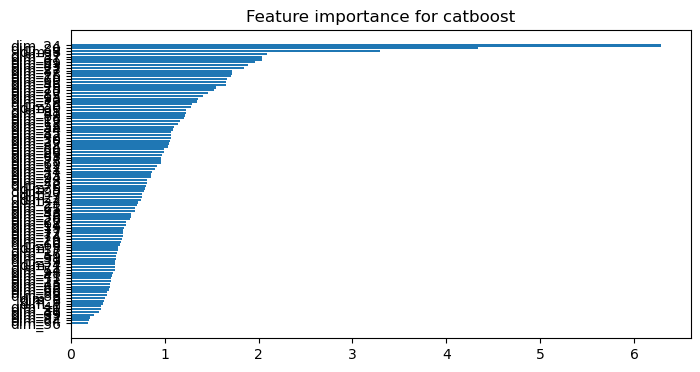

In [9]:
import matplotlib.pyplot as plt
for name in model_names:
    feature_importance = result_df.loc[name]['feature_importance']
    sorted_indices = np.argsort(feature_importance)[::]
    sorted_features = X_train_scaled_df.columns[sorted_indices]
    sorted_importance = feature_importance[sorted_indices]
    
    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importance)
    plt.title(f'Feature importance for {name}')


In [10]:
models

{'lightgbm': LGBMClassifier(verbose=-1),
 'decision_tree': DecisionTreeClassifier(),
 'xgboost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'random_forest': RandomForestClassifier(),
 'catboost': <catboost.core.CatBoostClassifier at 0x2a5465480>}

In [24]:
# get 10 worst performing dimensions for each model based on feature importance
import dalex as dx
worst_performing_dimensions = dict()
for name in model_names:
    worst_performing_dimensions[name] = None
for name in model_names:
    explainer = dx.Explainer(models[name], X_train_scaled_df, y_train, verbose=False)
    feature_importance = explainer.model_parts(random_state=42).result
    # print(feature_importance)
    full_model = feature_importance[feature_importance['variable'] == '_full_model_']['dropout_loss'].values[0]
    feature_importance = feature_importance[feature_importance['variable'].str.contains('dim')]
    diff = feature_importance['dropout_loss'] - full_model
    feature_importance['diff'] = diff
    feature_importance = feature_importance.sort_values(by='diff', ascending=False)
    # print(feature_importance)
    # get dimensions with diff lower than 25% of best performing dimension
    best_performing_dimension_top5percent = feature_importance['diff'].values[:int(len(feature_importance)*0.05)]
    # print(feature_importance)
    # print(best_performing_dimension_top5percent)
    # break
    best_performing_dimension = np.mean(best_performing_dimension_top5percent)
    # print(best_performing_dimension)
    feature_importance = feature_importance[feature_importance['diff'] < best_performing_dimension/4]
    dropped_dimensions = feature_importance['variable'].values
    worst_performing_dimensions[name] = dropped_dimensions

    
    print(f'Worst performing dimensions for {name}:')
    print(dropped_dimensions, len(dropped_dimensions))

    
worst_performing_dimensions

Worst performing dimensions for lightgbm:
['dim_81' 'dim_47' 'dim_16' 'dim_79' 'dim_32' 'dim_50' 'dim_30' 'dim_95'
 'dim_87' 'dim_0' 'dim_70' 'dim_85' 'dim_78' 'dim_55' 'dim_89' 'dim_58'
 'dim_56' 'dim_18' 'dim_65' 'dim_84' 'dim_44' 'dim_96' 'dim_63' 'dim_53'
 'dim_46' 'dim_2' 'dim_11' 'dim_57' 'dim_7' 'dim_34' 'dim_94' 'dim_76'
 'dim_52' 'dim_19' 'dim_20' 'dim_41' 'dim_77' 'dim_62' 'dim_48' 'dim_10'
 'dim_42' 'dim_4' 'dim_98' 'dim_28' 'dim_38' 'dim_3' 'dim_5' 'dim_91'
 'dim_29' 'dim_71' 'dim_26' 'dim_90' 'dim_67' 'dim_72' 'dim_54' 'dim_99'
 'dim_17' 'dim_66' 'dim_22' 'dim_23' 'dim_31' 'dim_33' 'dim_35' 'dim_88'
 'dim_86' 'dim_21' 'dim_13' 'dim_59' 'dim_14' 'dim_40' 'dim_68' 'dim_45'
 'dim_92' 'dim_74' 'dim_51' 'dim_49' 'dim_9' 'dim_39' 'dim_36' 'dim_1'
 'dim_83' 'dim_6' 'dim_64'] 83


/Users/adammajczyk/anaconda3/envs/ag/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Worst performing dimensions for decision_tree:
['dim_81' 'dim_55' 'dim_70' 'dim_58' 'dim_30' 'dim_15' 'dim_60' 'dim_87'
 'dim_46' 'dim_11' 'dim_79' 'dim_44' 'dim_23' 'dim_3' 'dim_32' 'dim_52'
 'dim_2' 'dim_33' 'dim_0' 'dim_25' 'dim_21' 'dim_93' 'dim_7' 'dim_5'
 'dim_39' 'dim_6' 'dim_42' 'dim_85' 'dim_75' 'dim_76' 'dim_68' 'dim_92'
 'dim_67' 'dim_96' 'dim_73' 'dim_31' 'dim_45' 'dim_13' 'dim_83' 'dim_26'
 'dim_74' 'dim_19' 'dim_40' 'dim_41' 'dim_22' 'dim_57' 'dim_48' 'dim_53'
 'dim_71' 'dim_78' 'dim_90' 'dim_38' 'dim_17' 'dim_20' 'dim_54' 'dim_89'
 'dim_94' 'dim_86' 'dim_88' 'dim_9' 'dim_16' 'dim_35' 'dim_47' 'dim_34'
 'dim_95' 'dim_59' 'dim_4' 'dim_1' 'dim_28' 'dim_91' 'dim_98' 'dim_51'
 'dim_50' 'dim_84' 'dim_62' 'dim_72' 'dim_77' 'dim_65' 'dim_14' 'dim_99'
 'dim_63' 'dim_66' 'dim_64' 'dim_36' 'dim_49' 'dim_10' 'dim_29'] 87
Worst performing dimensions for xgboost:
['dim_43' 'dim_61' 'dim_60' 'dim_37' 'dim_27' 'dim_25' 'dim_95' 'dim_75'
 'dim_87' 'dim_73' 'dim_58' 'dim_70' 'dim_82' 'dim

/Users/adammajczyk/anaconda3/envs/ag/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Worst performing dimensions for random_forest:
['dim_84' 'dim_18' 'dim_27' 'dim_70' 'dim_54' 'dim_33' 'dim_15' 'dim_83'
 'dim_93' 'dim_94' 'dim_10' 'dim_67' 'dim_68' 'dim_16' 'dim_17' 'dim_82'
 'dim_26' 'dim_47' 'dim_41' 'dim_81' 'dim_46' 'dim_45' 'dim_3' 'dim_42'
 'dim_96' 'dim_85' 'dim_59' 'dim_69' 'dim_25' 'dim_79' 'dim_77' 'dim_95'
 'dim_40' 'dim_49' 'dim_32' 'dim_51' 'dim_98' 'dim_53' 'dim_97' 'dim_55'
 'dim_56' 'dim_57' 'dim_92' 'dim_75' 'dim_39' 'dim_76' 'dim_87' 'dim_1'
 'dim_34' 'dim_63' 'dim_86' 'dim_78' 'dim_74' 'dim_73' 'dim_72' 'dim_71'
 'dim_7' 'dim_66' 'dim_64' 'dim_37' 'dim_38' 'dim_88' 'dim_61' 'dim_60'
 'dim_6' 'dim_58' 'dim_50' 'dim_5' 'dim_48' 'dim_44' 'dim_43' 'dim_4'
 'dim_62' 'dim_89' 'dim_9' 'dim_2' 'dim_28' 'dim_0' 'dim_29' 'dim_23'
 'dim_35' 'dim_12' 'dim_14' 'dim_30' 'dim_19' 'dim_20' 'dim_90' 'dim_31'
 'dim_13' 'dim_21' 'dim_22' 'dim_11' 'dim_99' 'dim_36' 'dim_65' 'dim_91'
 'dim_52'] 97
Worst performing dimensions for catboost:
['dim_11' 'dim_47' 'dim_85' 'd

{'lightgbm': array(['dim_81', 'dim_47', 'dim_16', 'dim_79', 'dim_32', 'dim_50',
        'dim_30', 'dim_95', 'dim_87', 'dim_0', 'dim_70', 'dim_85',
        'dim_78', 'dim_55', 'dim_89', 'dim_58', 'dim_56', 'dim_18',
        'dim_65', 'dim_84', 'dim_44', 'dim_96', 'dim_63', 'dim_53',
        'dim_46', 'dim_2', 'dim_11', 'dim_57', 'dim_7', 'dim_34', 'dim_94',
        'dim_76', 'dim_52', 'dim_19', 'dim_20', 'dim_41', 'dim_77',
        'dim_62', 'dim_48', 'dim_10', 'dim_42', 'dim_4', 'dim_98',
        'dim_28', 'dim_38', 'dim_3', 'dim_5', 'dim_91', 'dim_29', 'dim_71',
        'dim_26', 'dim_90', 'dim_67', 'dim_72', 'dim_54', 'dim_99',
        'dim_17', 'dim_66', 'dim_22', 'dim_23', 'dim_31', 'dim_33',
        'dim_35', 'dim_88', 'dim_86', 'dim_21', 'dim_13', 'dim_59',
        'dim_14', 'dim_40', 'dim_68', 'dim_45', 'dim_92', 'dim_74',
        'dim_51', 'dim_49', 'dim_9', 'dim_39', 'dim_36', 'dim_1', 'dim_83',
        'dim_6', 'dim_64'], dtype=object),
 'decision_tree': array(['dim_81', 'dim

In [25]:
# get intersection of worst performing dimensions
worst_performing_dimensions_intersection = set(worst_performing_dimensions['lightgbm']).intersection(set(worst_performing_dimensions['decision_tree']), set(worst_performing_dimensions['xgboost']), set(worst_performing_dimensions['random_forest']), set(worst_performing_dimensions['catboost']))
worst_performing_dimensions_intersection, len(worst_performing_dimensions_intersection)

({'dim_1',
  'dim_10',
  'dim_11',
  'dim_13',
  'dim_14',
  'dim_17',
  'dim_19',
  'dim_2',
  'dim_21',
  'dim_22',
  'dim_23',
  'dim_26',
  'dim_28',
  'dim_29',
  'dim_3',
  'dim_30',
  'dim_31',
  'dim_32',
  'dim_33',
  'dim_34',
  'dim_35',
  'dim_36',
  'dim_38',
  'dim_39',
  'dim_4',
  'dim_40',
  'dim_41',
  'dim_44',
  'dim_45',
  'dim_46',
  'dim_47',
  'dim_48',
  'dim_49',
  'dim_5',
  'dim_51',
  'dim_52',
  'dim_54',
  'dim_57',
  'dim_58',
  'dim_59',
  'dim_6',
  'dim_62',
  'dim_63',
  'dim_64',
  'dim_65',
  'dim_66',
  'dim_67',
  'dim_68',
  'dim_7',
  'dim_70',
  'dim_71',
  'dim_72',
  'dim_74',
  'dim_76',
  'dim_77',
  'dim_81',
  'dim_83',
  'dim_84',
  'dim_85',
  'dim_86',
  'dim_88',
  'dim_89',
  'dim_9',
  'dim_90',
  'dim_91',
  'dim_92',
  'dim_94',
  'dim_96',
  'dim_98',
  'dim_99'},
 70)

In [26]:
# save which dimensions to remove to file
with open('predictive_models/worst_performing_dimensions_intersection.pkl', 'wb') as f:
    pickle.dump(worst_performing_dimensions_intersection, f)

Text(0, 0.5, 'Prawdopodobieństwo [0, 1]')

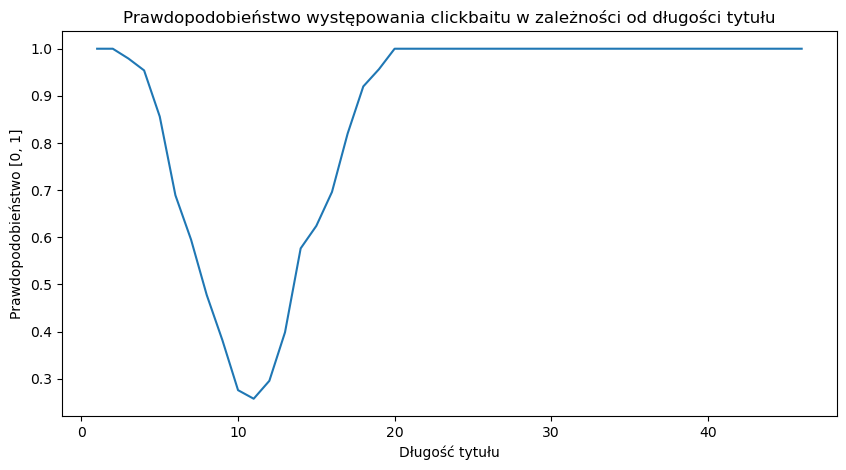

In [27]:
# do we want title length as a feature?
df['title_length'] = df['title'].apply(lambda x: len(x))

df.groupby('title_length')['is_clickbait'].mean().plot( figsize=(10, 5))
plt.title('Prawdopodobieństwo występowania clickbaitu w zależności od długości tytułu')
plt.xlabel('Długość tytułu')
plt.ylabel('Prawdopodobieństwo [0, 1]')